In [1]:
import os
import numpy as np

# gs= np.arange(-8,-1, 1)
# gnns = np.arange(0,1,1)

# for g in gs:
#     print(round(g,2),end="->")
#     for gnn in gnns:
#         print(round(gnn,2),end=", ")
#         os.system("./job 3 60 0 1 400 0 dipole "+str(g)+" "+str(round(gnn,2))+" 0.01")
#         os.system("./job 3 60 0 1 400 0 dipole "+str(g)+" "+str(round(gnn,2))+" 0.05")
#         os.system("./job 3 60 0 1 400 0 dipole "+str(g)+" "+str(round(gnn,2))+" 0.2")
#     print("")
# print("DONE")

In [2]:
def calcOvl(file1,file2):
    if os.path.isfile(file1) and os.path.isfile(file2):
        if file1 == file2:
            return 1.0
        vec1 = np.loadtxt(file1)
        vec2 = np.loadtxt(file2)

        Ovl = 0.0
        for i in range(len(vec1)):
            Ovl += vec1[i]*vec2[i]
        return np.abs(Ovl)
    #print(file2)
    return -1

def calcEnergy(file2):
    if "vectors_" in file2:
        file2 = file2.replace("vectors","energies")
    if  os.path.isfile(file2):
        data = np.loadtxt(file2)
        return data[0]
    return -123
    
def calcOvls(n,g0, gdd0, sigma):
    Ovls = []
    OvlMin = 0.0
    gs= [1]+list(range(50,1000, 50))
    gdds = np.arange(0,151,10)  
    for g in gs:
        Ovls.append([])
        for gdd in gdds:
            if n==2:
                file1 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
            if n==3:
                file1 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
            if n==4:
                file1 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'

            tmpOvl = calcOvl(file1,file2)
            Ovls[-1].append(tmpOvl)
            if tmpOvl < OvlMin:
                OvlMin = tmpOvl
    return [Ovls, OvlMin]
        

def calcOvls2(n,g0, gdd0, sigma):
    Ovls = []
    Energies = []
    OvlMin = 0.0
    gs= list(range(-20,0,1))+list(range(1,50,1))
    gdds = np.arange(0,50,1)  
    for g in gs:
        Ovls.append([])
        Energies.append([])
        for gdd in gdds:
            if n==2:
                file1 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
            if n==3:
                file1 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
            if n==4:
                file1 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
                file2 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'

            tmpOvl = calcOvl(file1,file2)
            tmpEnergy = calcEnergy(file2)
            Ovls[-1].append(tmpOvl)
            Energies[-1].append(tmpEnergy)
            if tmpOvl < OvlMin:
                OvlMin = tmpOvl
    return [Ovls, Energies, OvlMin]

def calcOvlsCrossG(n,g0, gdd0, gcut,sigma):
    Ovls = []
    OvlMin = 0.0
    gdds = np.arange(0,151,10)  
    for gdd in gdds:
        if n==2:
            file1 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{gcut:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
        if n==3:
            file1 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{gcut:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'
        if n==4:
            file1 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{gcut:.6f}"+'_gdd'+str(round(gdd,2))+'.000000_sigma'+sigma+'.txt'

        tmpOvl = calcOvl(file1,file2)
        Ovls.append(tmpOvl)
        if tmpOvl < OvlMin:
            OvlMin = tmpOvl
    return [gdds, Ovls, OvlMin]

def calcOvlsCrossGdd(n,g0, gdd0, gddcut,sigma):
    Ovls = []
    OvlMin = 0.0
    gs = np.arange(0,1000,50)  
    for g in gs:
        if n==2:
            file1 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'
        if n==3:
            file1 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'
        if n==4:
            file1 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'

        tmpOvl = calcOvl(file1,file2)
        Ovls.append(tmpOvl)
        if tmpOvl < OvlMin:
            OvlMin = tmpOvl
    return [gs, Ovls, OvlMin]

def calcOvlsCrossGdd2(n,g0, gdd0, gddcut,sigma):
    Ovls = []
    OvlMin = 0.0
    gs = list(np.arange(-20,0,1))+list(range(1,50,1))  
    for g in gs:
        if n==2:
            file1 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n2_pmax150_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'
        if n==3:
            file1 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n3_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'
        if n==4:
            file1 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g0:.6f}"+'_gdd'+str(round(gdd0,2))+'.000000_sigma'+sigma+'.txt'
            file2 = './data/vectors_n4_pmax60_ptot0_neig1_m400_g'+f"{g:.6f}"+'_gdd'+str(round(gddcut,2))+'.000000_sigma'+sigma+'.txt'

        tmpOvl = calcOvl(file1,file2)
        Ovls.append(tmpOvl)
        if tmpOvl < OvlMin:
            OvlMin = tmpOvl
    return [gs, Ovls, OvlMin]

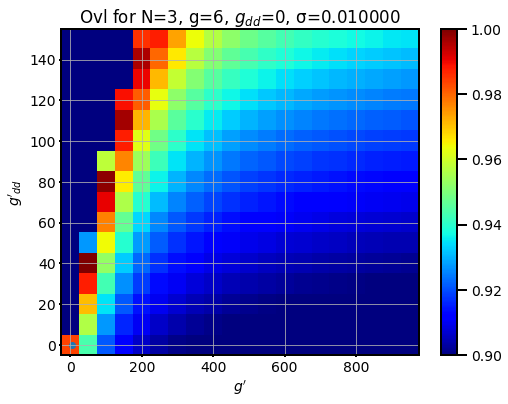

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Edit overall plot parameters
# Font parameters
#mpl.rcParams['font.family'] = 'DejaVu'
mpl.rcParams['font.size'] = 14
# Edit axes parameters
mpl.rcParams['axes.linewidth'] = 2
# Tick properties
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.direction'] = 'out'


###########################################
# to set ##################################

N = 3
g = 6
gdd = 0
σ = '0.010000'

###########################################

[Ovls, MinOvl]= calcOvls(N,g,gdd,σ)
#[Ovls, Energies, MinOvl]= calcOvls2(N,g,gdd,σ)
Ovls = np.array(Ovls)
Ovls = np.transpose(Ovls)
#Energies = np.transpose(Energies)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
# Remove x and y ticks
ax.xaxis.set_tick_params(size=2)
ax.yaxis.set_tick_params(size=2)
#ax.set_xticks([])
ax.set_ylabel("$g'_{dd}$")
ax.set_xlabel("$g'$")
ax.set_title("Ovl for N="+str(N)+", g="+str(g)+", $g_{dd}$="+str(gdd) + ", σ="+σ)
#ax.set_yticks([])
#plt.imshow(Ovls, origin='lower', cmap='plasma', interpolation='bilinear', vmin=MinOvl, vmax=1)
plt.imshow(Ovls, origin='lower', cmap='jet',extent=[-25,975,-5,155], interpolation='none', vmin=0.9, vmax=1,aspect='auto')
#plt.imshow(Ovls, origin='lower', cmap='jet',extent=[-20.5,50.5,-0.5,50.5], interpolation='none', vmin=0, aspect='auto')
#plt.imshow(Energies, origin='lower', cmap='jet',extent=[-20,50,0,50], interpolation='none', aspect='auto')

plt.colorbar()
plt.grid()
plt.scatter([g], [gdd])
plt.show()
#plt.savefig("images/SuperDroplet_C7.png")


\begin{align}
Ovl = \left< GS(g,g_{dd}) | GS(g',g'_{dd}) \right>
\end{align},
where $GS$ means ground state of system. 

In [6]:
from scipy.interpolate import make_interp_spline, BSpline

def plotCrossGdd(n,sigma,g0,gdd0,gddCut,interpolate=0):
    [gs, Ovls, MinOvl]= calcOvlsCrossGdd2(n,g0,gdd0,gddCut,sigma)
    if interpolate==1:
        gsNew = np.linspace(0,150,300)
        spl = make_interp_spline(gs, Ovls, k=2)  # type: BSpline
        OvlsNew = spl(gsNew)
        plt.plot(gsNew,OvlsNew,label="n="+str(n)+", σ="+sigma+", g="+str(g0)+ "$, g_{dd}=$"+str(gdd0)+", $g'_{dd}$="+str(gddCut))
    else:
        plt.plot(gs,Ovls,label="n="+str(n)+", σ="+sigma+", g="+str(g0)+ "$, g_{dd}$="+str(gdd0)+", gdd'="+str(gddCut))
#
#tu liczę przekroje przy ustalonym gdd_cut
plt.figure(figsize=(8,6))

plotCrossGdd(3,'0.200000',0.75,15,0,interpolate=0)
plotCrossGdd(3,'0.200000',150,135,0,interpolate=0)
plt.ylabel("$Ovl$")
plt.xlabel("$g'_{dd}$")
plt.ylim([0.2,1.01])
plt.grid()
plt.legend()
plt.show()